In [207]:
''' 
General Neuron:
   |______Sensory Neuron:
   |            |____Photoreceptor
   |            |____Mechanoreceptor
   |
   |______Motor Neuron:
                |____Alpha Motor Neuron
                |____Gamma Motor Neuron
'''

' \nGeneral Neuron:\n   |______Sensory Neuron:\n   |            |____Photoreceptor\n   |            |____Mechanoreceptor\n   |\n   |______Motor Neuron:\n                |____Alpha Motor Neuron\n                |____Gamma Motor Neuron\n'

In [208]:
pip install numpy matplotlib panda

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [209]:
# A generic neuron with basic properties and functions common to all neuron types.
class GeneralNeuron:
    # Constructor (with defualt value for firing_rate)
    def __init__(self, firing_rate=0.0):
        self.firing_rate = firing_rate

    # Calculates a firing rate based on the strength of that stimulus.
    def Activate(self, stimulus):
        pass

# A neuron that detects and responds to external stimuli. Each sensory neuron is sensitive to a specific type of stimulus.
class SensoryNeuron(GeneralNeuron):
    # Constructor
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

# Process the specific stimulus and activate the neuron
    def SenseStimulus(self):
        pass

# A neuron responsible for initiating muscle movement by sending activation signals to a target muscle.
class MotorNeuron(GeneralNeuron):
    # Constructor
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    # Trigger a response in the target muscle
    def ControlMuscle(self):
        pass

# A sensory neuron specifically sensitive to light.
class Photoreceptor(SensoryNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    # Activate based on light intensity
    def LightDetection(self, light_intensity):
        pass

# A sensory neuron that responds to pressure.
class Mechanoreceptor(SensoryNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")

    # Activate based on pressure level
    def PressureDetection(self, pressure):
        pass

# A motor neuron that controls skeletal muscles.
class AlphaMotorNeuron(MotorNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    # Initiate muscle contraction or movement
    def SkeletalMuscleControl(self):
        pass

# A motor neuron that controls muscle spindles, helping regulate muscle tone.
class GammaMotorNeuron(MotorNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    # Adjust muscle spindle tension
    def MuscleSpindleControl(self):
        pass

The length of the original array: 100
The length of the sampled array: 28


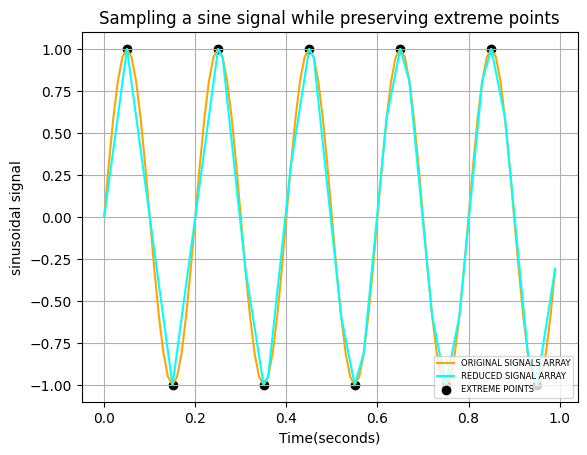

In [210]:
import numpy as np
import matplotlib.pyplot as plt

def calculateExtrime(arr: np.array):
    '''The np.diff function calculates the difference between adjacent values ​​in the array.
    I use this to calculate the rate of change (slope) between adjacent points in the signal.
    This helps me detect changes in direction (increase or decrease in the sine wave).'''
    slope = np.diff(arr)

    '''I use this logic to detect local maxima and minima:
    (slope[:-1] > 0) checks where the slope is positive (ascending) except for the last value.
    (slope[1:] < 0) checks where the slope is negative (descending) except for the first value.
    If the slope is positive and then becomes negative, this is a local maximum (peak).
    I use np.where to find the indices where the condition is true.
    The result is an index list, but since np.diff returns differences between adjacent values,
    the extreme points in the original array are always one step ahead. We add 1 to correct this.'''
    maxima = np.where((slope[:-1] > 0) & (slope[1:] < 0))[0] + 1

    minima = np.where((slope[:-1] < 0) & (slope[1:] > 0))[0] + 1

    # Return two values: the maxima values and minima values.
    return maxima, minima

def sinusoidalSignal(arr: np.array):
    # Set the number of steps to divide the signal by 5. This means I want to reduce the array by 20%.
    steps = 5 
    
    # Calculate the size of the sampled array by dividing the original array length by 'steps'.
    # Ensure that there is at least one value in the new array (using max to avoid zero division).
    size = max(len(arr) // steps, 1)

    # calculateExtreme function.
    maxima, minima = calculateExtrime(arr)
    
    '''I use np.linspace to create an array of evenly spaced points, ensuring 20% of the original points are selected.
    np.linspace returns float values by default, so I convert them to integers (dtype=int) for indexing the array.'''
    sampledPoint = np.linspace(0, len(arr) - 1, size, dtype=int)
    
    '''I use np.concatenate to combine the sampled points, maxima, and minima into a single array of indices.
    Then, np.unique ensures there are no duplicate indices by returning only unique values.'''
    all_indices = np.unique(np.concatenate((sampledPoint, maxima, minima)))
    
    # Return two values: the values in the original array at the indices I calculated, and the indices themselves.
    return arr[all_indices], all_indices

# Below is the code to verify the functionality of the implementation:

# Generate a time array from 0 to 1 second with a step size of 0.01 seconds (i.e., time is from 0 to 1, with 100 points).
time = np.arange(0, 1, 0.01)

# Set the frequency of the sinusoidal signal to 5 Hz (5 cycles per second).
frequency = 5  

# Create the array of sinusoidal signal using the sin function with the given frequency.
arr = np.sin(2 * np.pi * frequency * time)

# Call calculateExtreme function.
maxima, minima = calculateExtrime(arr)

# Call the function to downsample the sinusoidal signal.
sampleArr, sampleIndices = sinusoidalSignal(arr)

# Map the sampled indices to their corresponding time values.
newTime = time[sampleIndices]

# Print the length of the original array.
print("The length of the original array:", len(arr))

# Print the length of the sampled array.
print("The length of the sampled array:", len(sampleArr))

# Visualization:
# Plot the original signal in orange.
plt.plot(time, arr, label="ORIGINAL SIGNALS ARRAY", color='orange')

# Plot the downsampled signal in blue.
plt.plot(newTime, sampleArr, label="REDUCED SIGNAL ARRAY", color='cyan')

# Mark and scatter the local maxima (red points).
plt.scatter(time[maxima], arr[maxima], label="EXTREME POINTS", color='black',)

# Mark and scatter the local minima (red points).
plt.scatter(time[minima], arr[minima], color='black')

# Add a title and labels to the plot.
plt.title('Sampling a sine signal while preserving extreme points')
plt.xlabel('Time(seconds)')
plt.ylabel('sinusoidal signal')

# Display the legend in the lower right corner with a font size of 6.
plt.legend(loc='lower right', fontsize=6)
# Prints squares on the screen.
plt.grid(True)
# Show the graph.
plt.show()


In [211]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


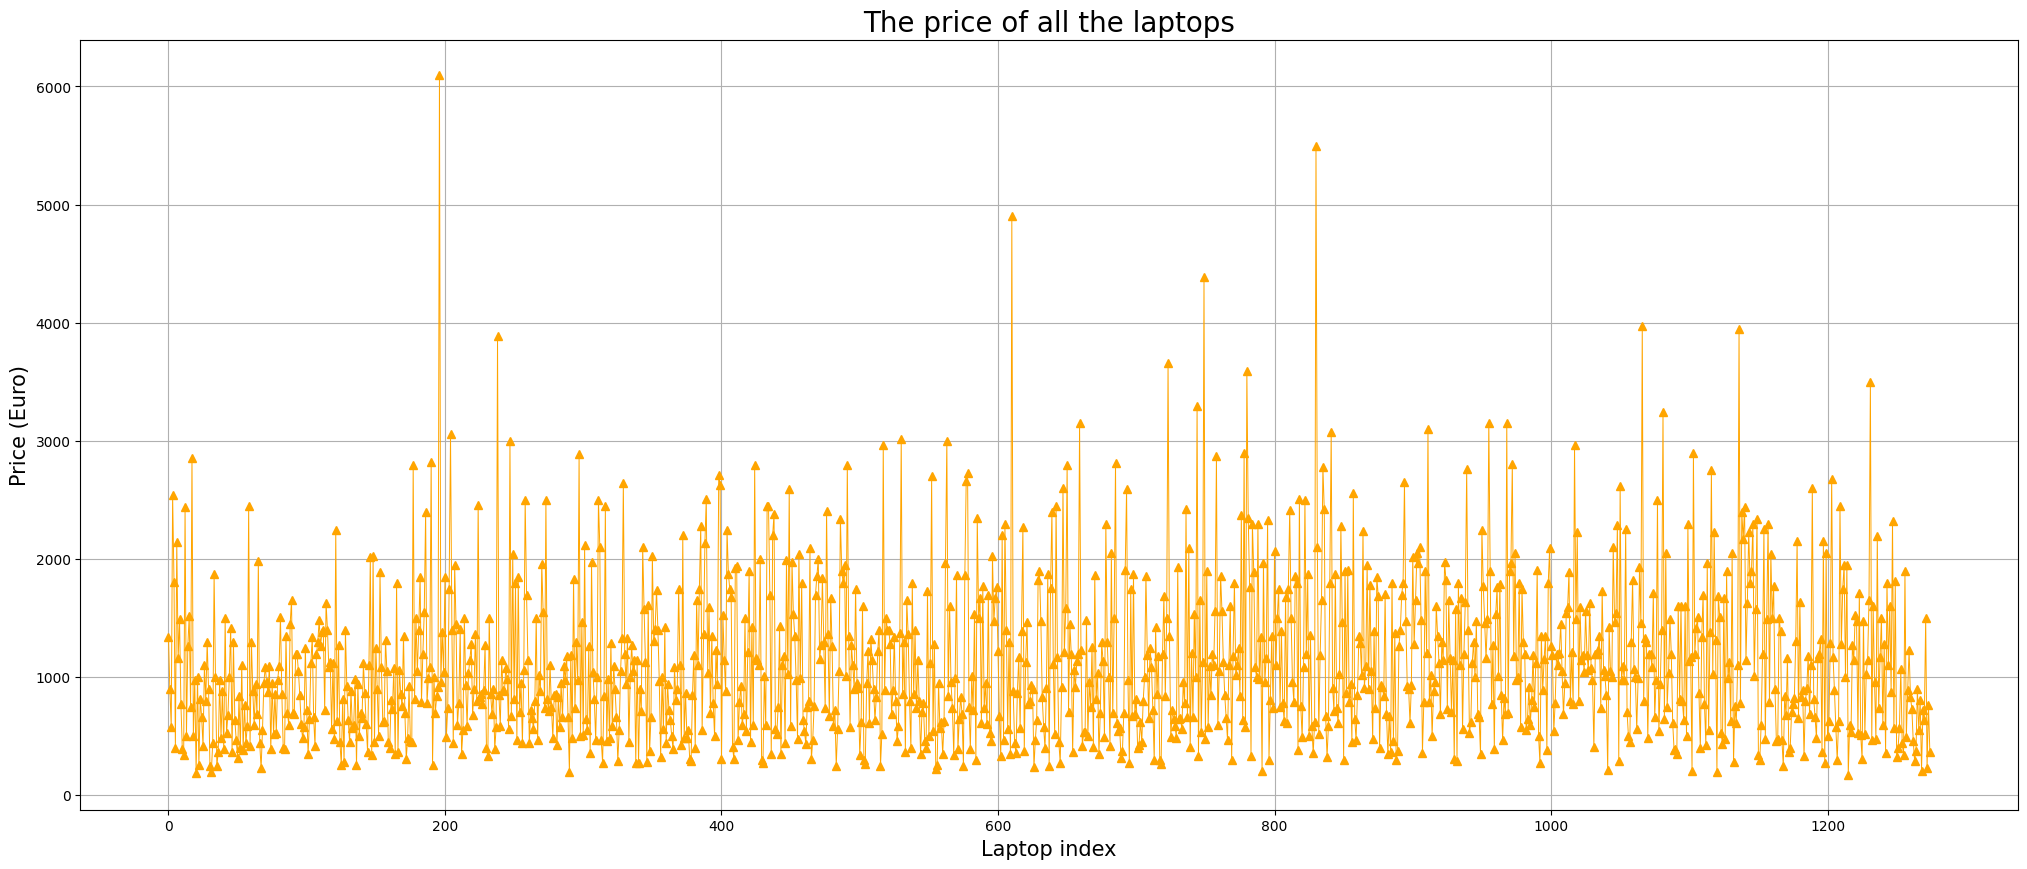

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# Creating a figure with a specific size for the plot
plt.figure(figsize = (25,10))

'''when specify only file['Price (Euro)'], each index is automatically concatenated with its corresponding price at the file.
linewidth controls the thickness of the plot line, linestyle specifies a solid line,
marker specifies the marker type, and color sets the line color to orange'''
plt.plot(file['Price (Euro)'], linewidth=0.7, linestyle='-', marker='^', color='orange')

# Adding a title to the plot with a specific font size
plt.title('The price of all the laptops', fontsize=20)

# Adding a label to the x-axis with a specific font size
plt.xlabel('Laptop index', fontsize=15)

# Adding a label to the y-axis with a specific font size
plt.ylabel('Price (Euro)', fontsize=15)

# Prints squares on the screen.
plt.grid(True)

# Show the graph.
plt.show()

Average laptop price for each company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

Company with the most expensive laptops on average:
The highest avg price company: Razer 
The highest average price: 3346.14 Euro


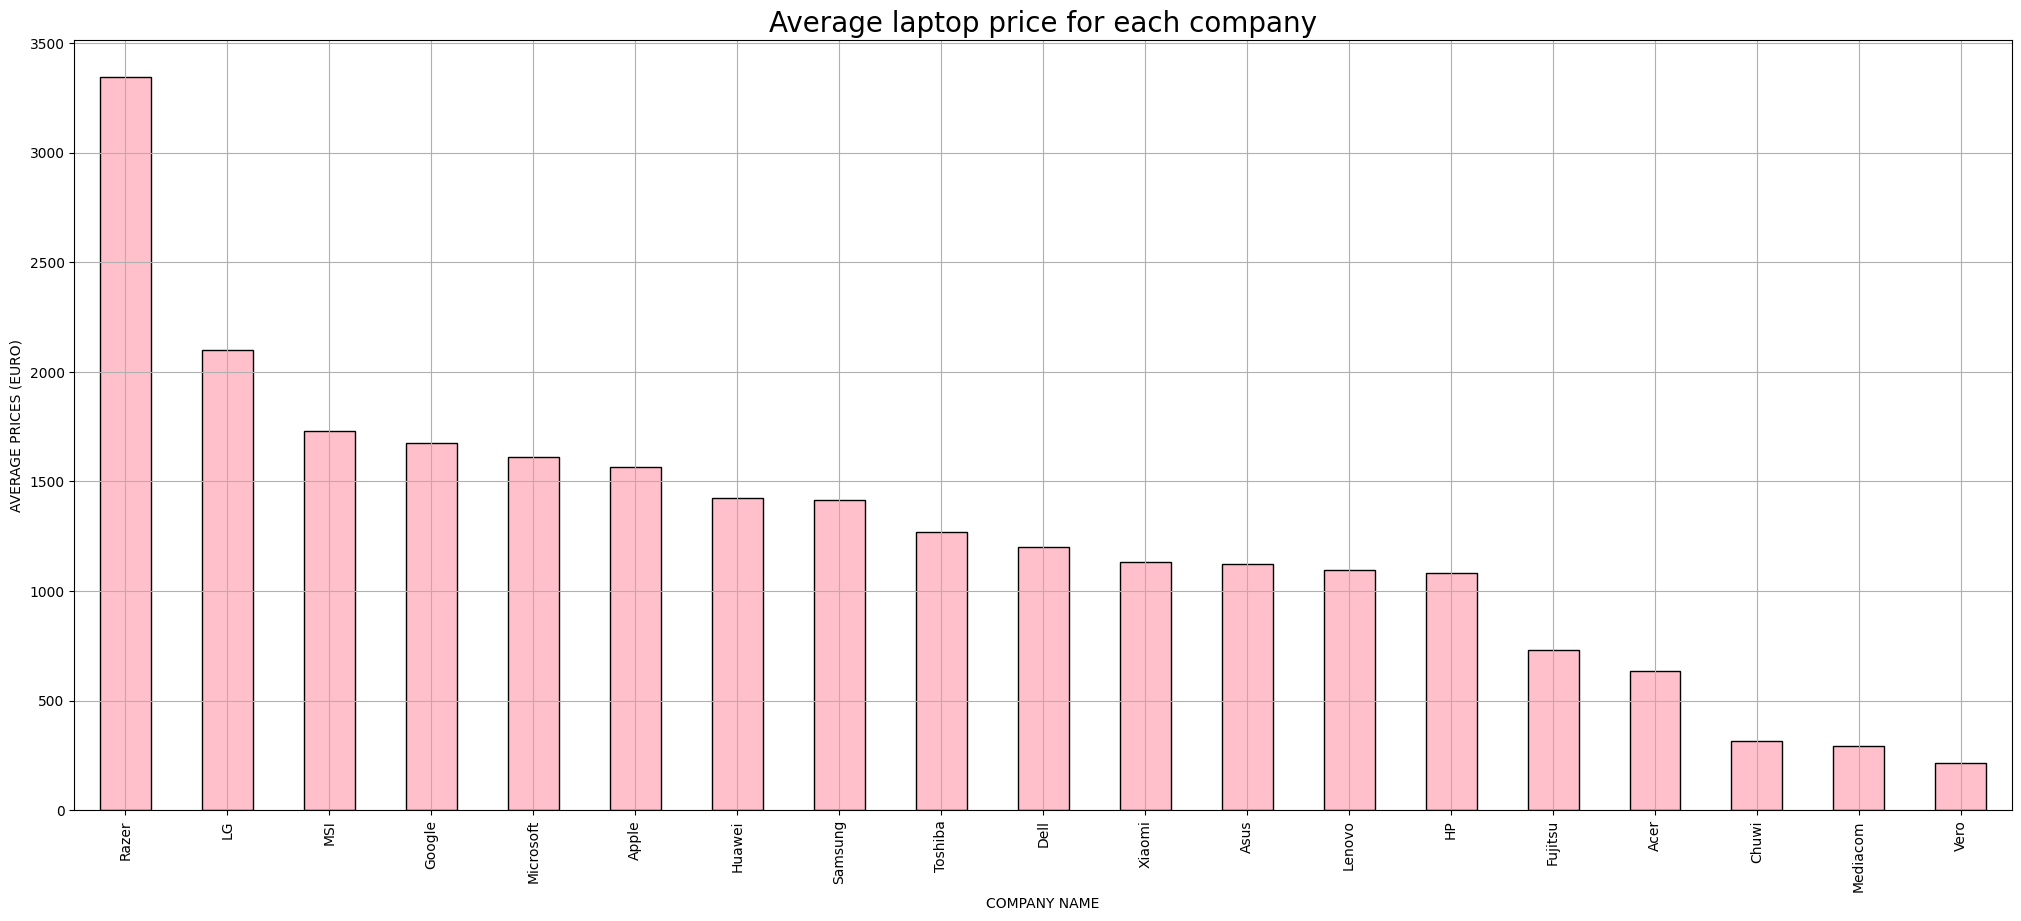

In [213]:
import pandas as pd  
import matplotlib.pyplot as plt  

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# groupby(): Groups data based on the 'Company' column
# mean(): Calculates the mean (average) for the 'Price (Euro)' column within each group
# sort_values(): Sorts the average prices in escending order (I want it in desending order- False)
company_avg_price = file.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

# idxmax(): Returns the index (in this case, the company name) corresponding to the maximum value in the series
highest_avg_price_company = company_avg_price.idxmax()  

# max(): Returns the maximum value in the series (the highest average price)
highest_avg_price = company_avg_price.max()

# Prints information
print("Average laptop price for each company:") 
print(company_avg_price) 

# format(): Formats the string with placeholders for variables (e.g., company name and price) 
# {:.2f}: is a string formatting specifier that ensures the value is rounded with 2 decimal places
print("\nCompany with the most expensive laptops on average:")  
print("The highest avg price company: {} \nThe highest average price: {:.2f} Euro".format(highest_avg_price_company, highest_avg_price))

# figure(): Sets the figure size for the plot
plt.figure(figsize=(25, 10))  

# plot(): Creates a bar chart with the average prices
# kind='bar': Specifies the bar chart type
# color: Sets the color of the bars
# edgecolor: Defines the border color of the bars
company_avg_price.plot(kind='bar', color='pink', edgecolor='black')  

# Adding a title to the plot with a specific font size
plt.title('Average laptop price for each company', fontsize=20)

# Adds a label to the x-axis
plt.xlabel('COMPANY NAME')  

# Adds a label to the y-axis
plt.ylabel('AVERAGE PRICES (EURO)')  

# Prints squares on the screen.
plt.grid(True)  

# show the graph.
plt.show()  


In [214]:
import pandas as pd

# Define a function to map inconsistent OS names to uniform values
def mapping(os_name):
    # Convert to lowercase and remove leading/trailing spaces for consistency
    os_name = os_name.lower().strip()
    if 'windows' in os_name:
        return 'Windows'
    elif 'chrome' in os_name:
        return 'Chrome OS'
    elif 'linux' in os_name:
        return 'Linux'
    elif 'mac' in os_name:
        return 'MacOS'
    elif 'no os' in os_name:
        return 'No OS'
    elif 'android' in os_name:
        return 'Android'

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# Replace values in the 'OpSys' column based on the mapping
# This replaces the inconsistent OS names in the column with their uniform counterparts
file['OpSys'] = file['OpSys'].apply(mapping)

# Get the unique operating systems after cleaning
# 'unique()' retrieves all distinct values in the 'OpSys' column
# Make it a list
unique_os = file['OpSys'].unique().tolist()

# Print the unique operating systems after cleaning
print("\nUnique operating systems after cleaning:")
print(unique_os)



Unique operating systems after cleaning:
['MacOS', 'No OS', 'Windows', 'Linux', 'Android', 'Chrome OS']


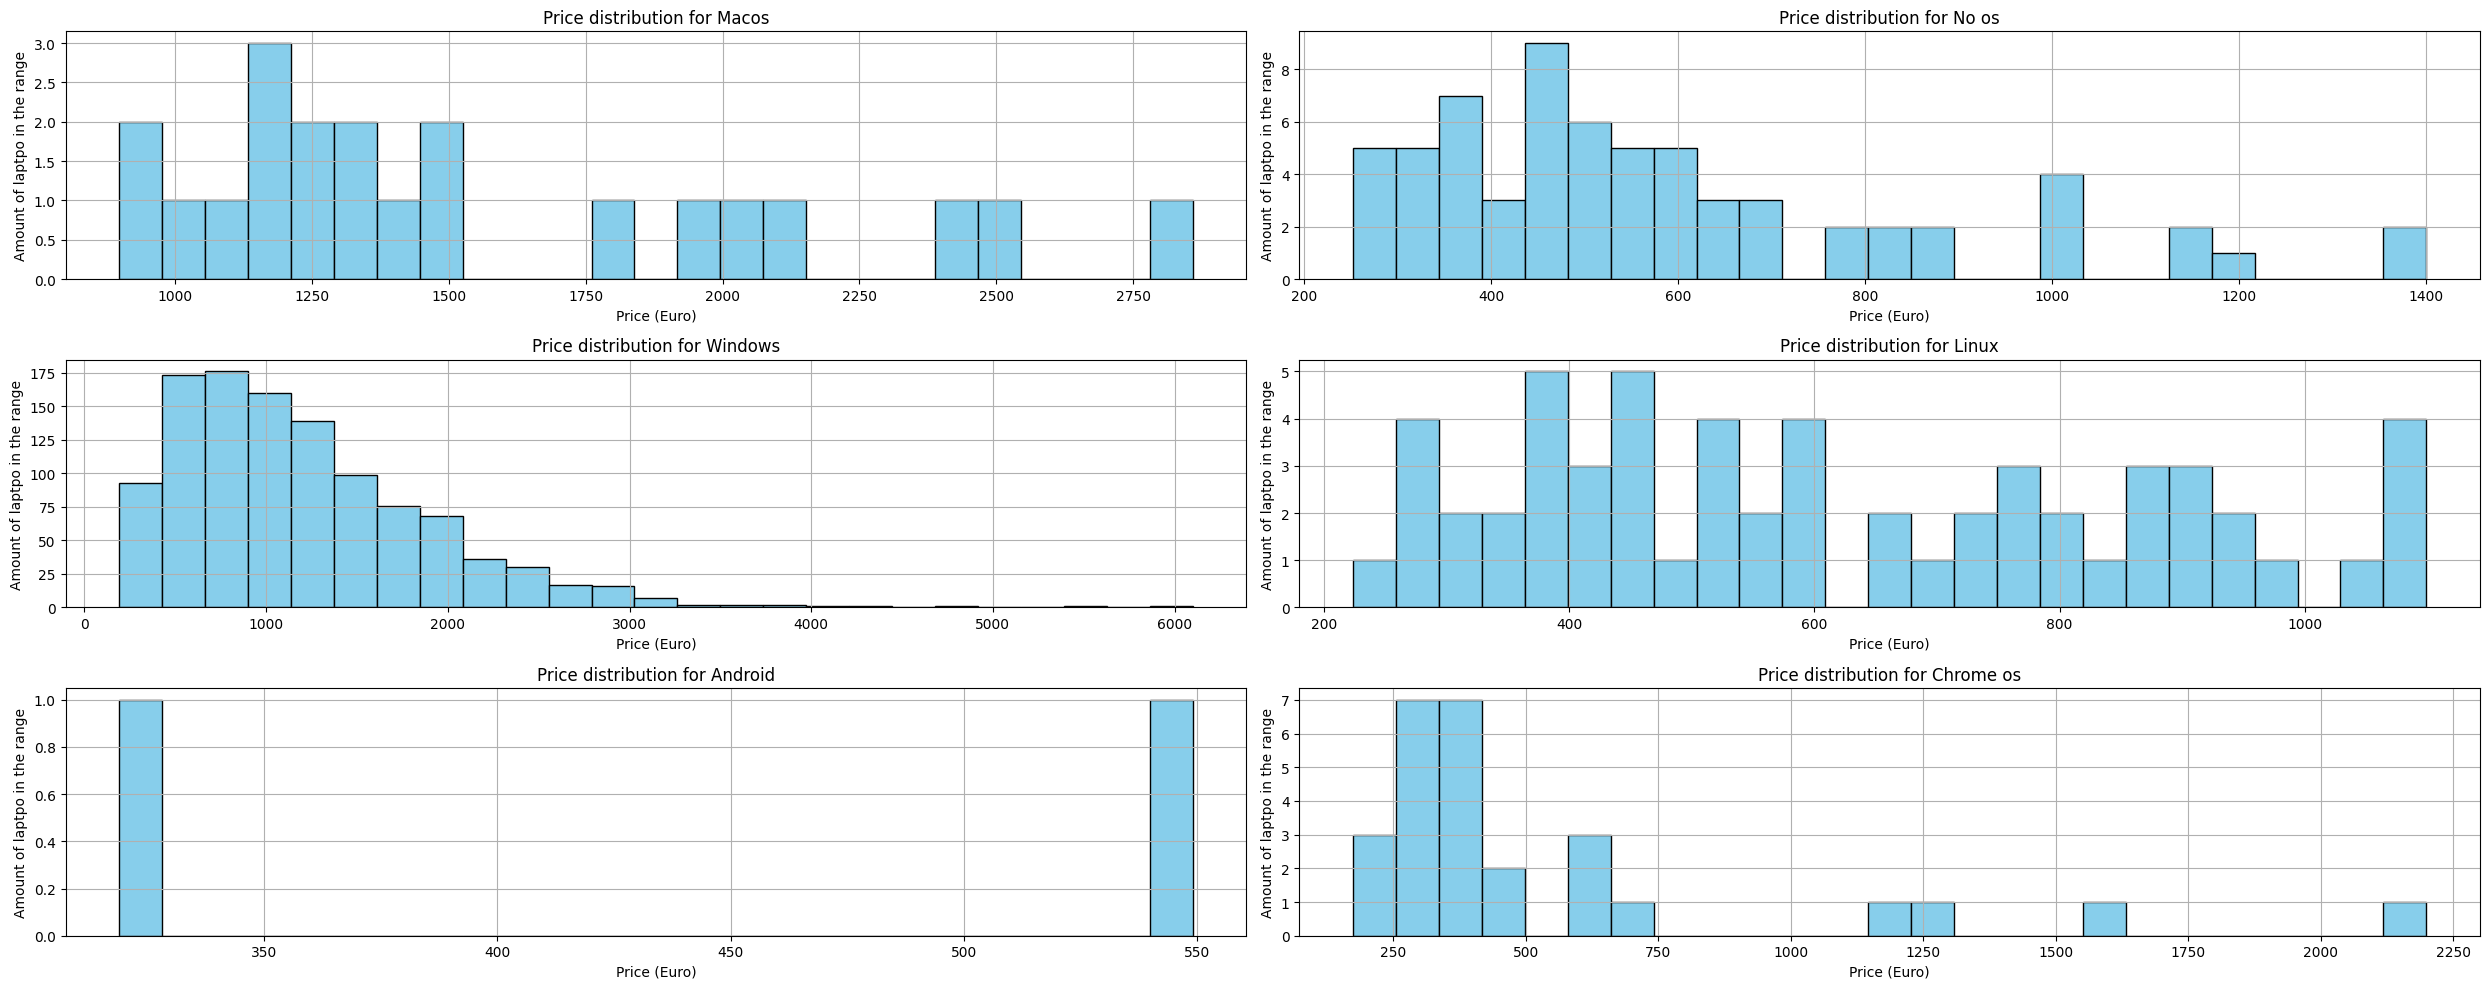

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# Replace values in the 'OpSys' column based on the mapping
# This replaces the inconsistent OS names in the column with their uniform counterparts
file['OpSys'] = file['OpSys'].apply(mapping)

# Get the unique operating systems after cleaning
# 'unique()' retrieves all distinct values in the 'OpSys' column
# Make it a list
unique_os = file['OpSys'].unique().tolist()

# Create a figure with a larger size for better layout
plt.figure(figsize = (25,10))

# Loop over each unique operating system to create individual plots 
for i, os in enumerate (unique_os, start = 1):

    # Create subplot (3 rows, 2 columns), with i as the subplot number
    plt.subplot(3, 2, i )

    # Filter the dataframe for the current OS
    subset = file[file['OpSys']==os]

    # Create a histogram
    plt.hist(subset['Price (Euro)'], bins = 25, color = 'skyblue', edgecolor = "black")
    
    # Prints squares on the screen.
    plt.grid(True)

    # Dynamic set title with capitalized OS name
    plt.title(f"Price distribution for {os.capitalize()}")

    # Adds a label to the x-axis
    plt.xlabel('Price (Euro)')

    # Adds a label to the y-axis
    plt.ylabel('Amount of laptpo in the range')

# Adjust layout to prevent overlap of plots
plt.tight_layout()

# show the graph.
plt.show()

Average price for each RAM size:
RAM (GB)
2      247.634375
4      576.109101
6      619.356571
8     1184.429413
12    1239.438400
16    1941.193081
24    2206.333333
32    3413.085882
64    3975.000000
Name: Price (Euro), dtype: float64


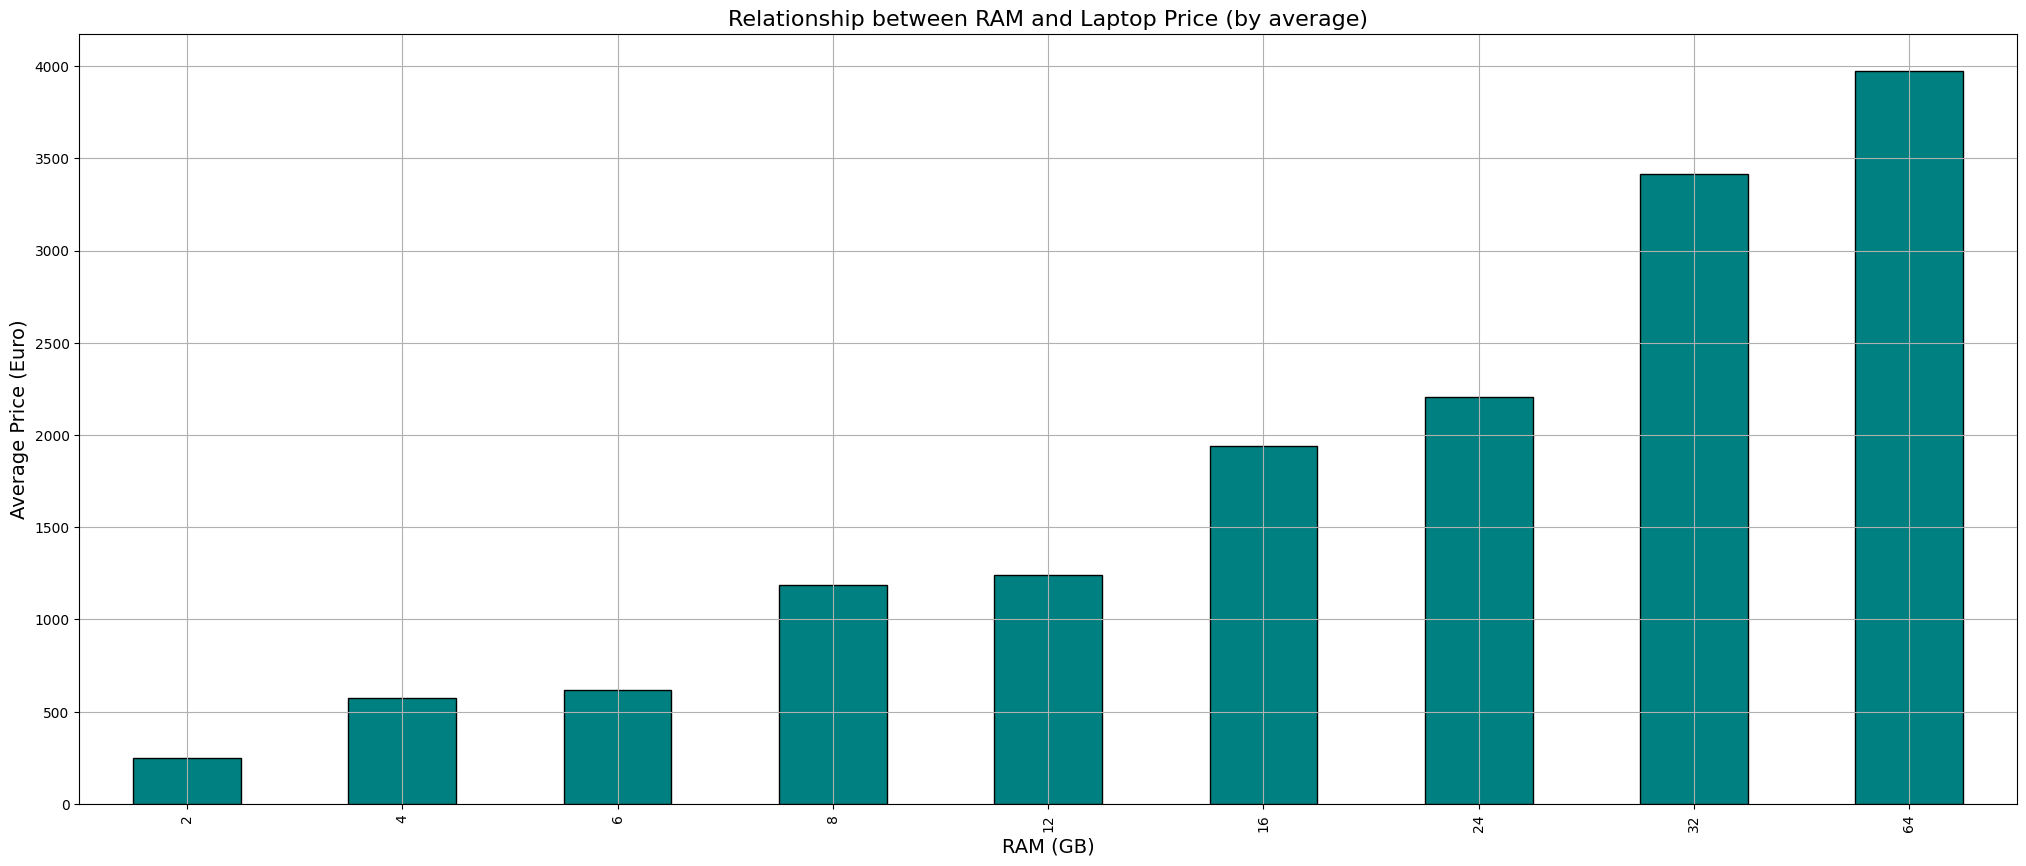

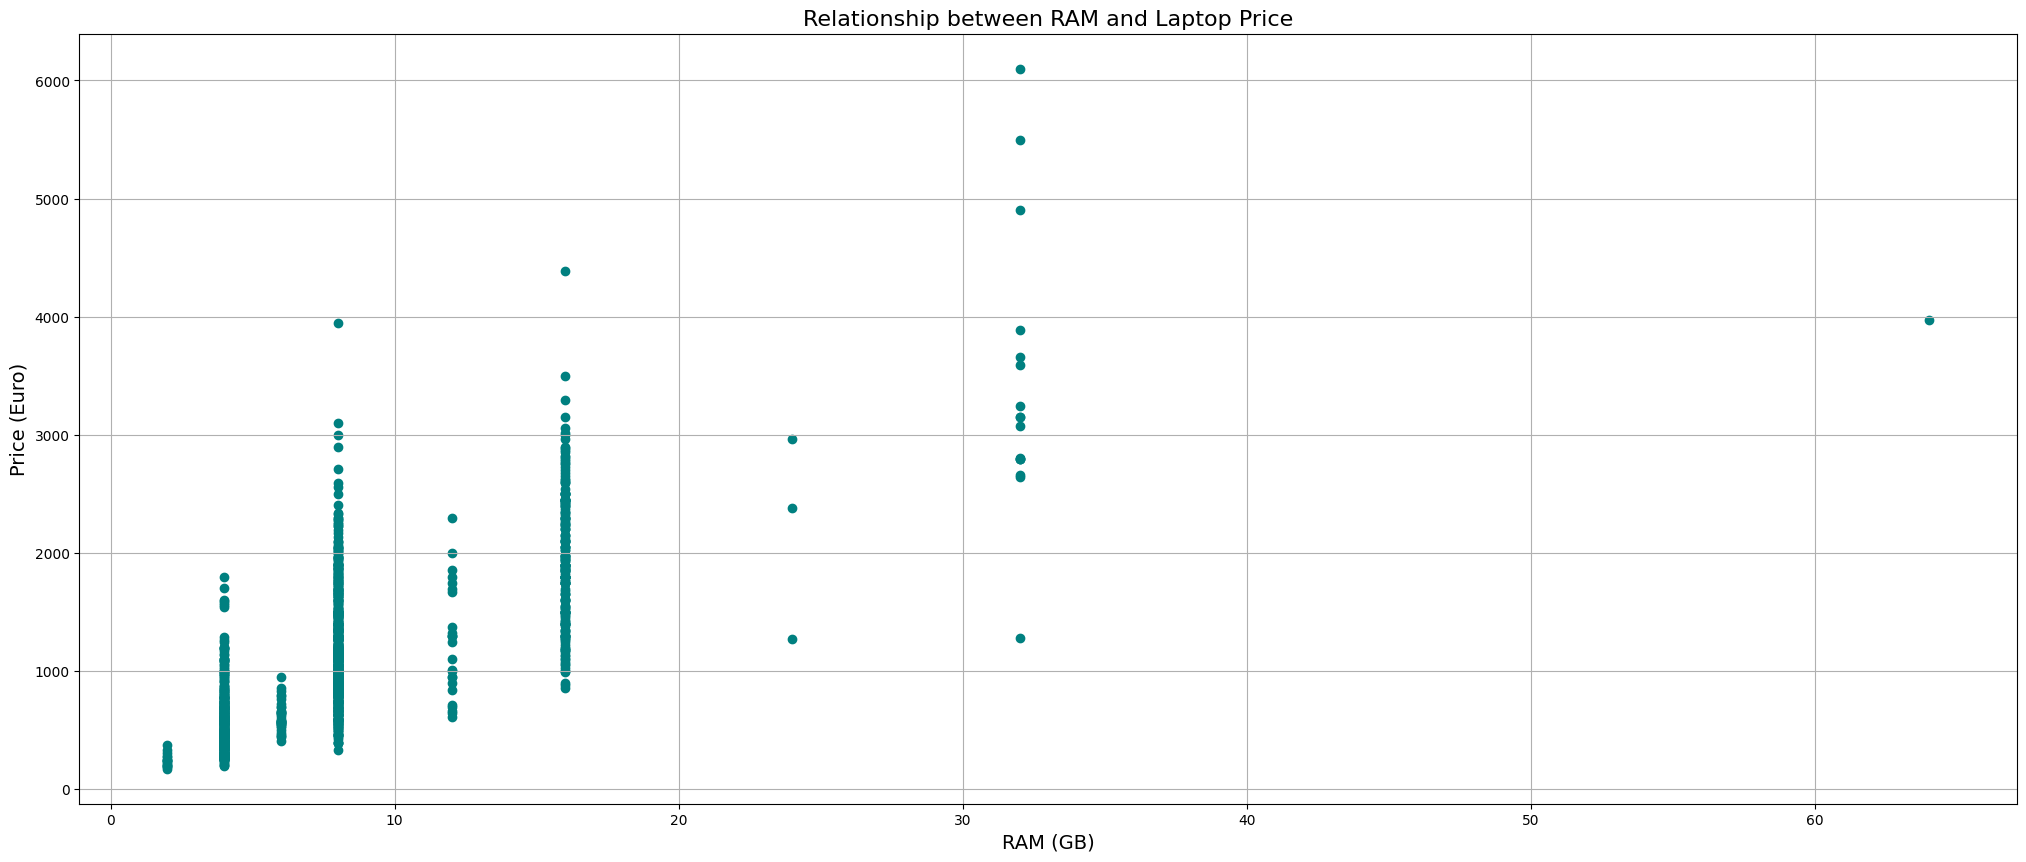

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")  # Load the CSV file into a pandas DataFrame 'file'.

# Grouping the data by RAM size and calculating the average price for each RAM size
ram_price_avg = file.groupby('RAM (GB)')['Price (Euro)'].mean() 

# Print the results for clarity
print("Average price for each RAM size:")  
print(ram_price_avg)

# Set the figure size for the plot.
plt.figure(figsize=(25, 10)) 

# Creating a bar plot to visualize the relationship between RAM and price (by average)
ram_price_avg.plot(kind='bar', color='teal', edgecolor='black')  

# Set the title of the plot.
plt.title('Relationship between RAM and Laptop Price (by average)', fontsize=16) 

# Adds a label to the x-axis
plt.xlabel('RAM (GB)', fontsize=14) 

# Adds a label to the y-axis
plt.ylabel('Average Price (Euro)', fontsize=14)

# Prints squares on the screen.
plt.grid(True)

# show the graph.
plt.show()

# Scatter plot to show the relationship between RAM size and laptop price (another visualization- by regular price and not by average)
# Set the figure size for the scatter plot.
plt.figure(figsize = (25,10)) 

# Create a scatter plot.
plt.scatter(file['RAM (GB)'], file['Price (Euro)'], color = 'teal')  

# Set the title for the scatter plot.
plt.title('Relationship between RAM and Laptop Price', fontsize = 16) 

# Adds a label to the x-axis
plt.xlabel('RAM (GB)', fontsize = 14) 

# Adds a label to the y-axis
plt.ylabel('Price (Euro)', fontsize = 14) 

# Prints squares on the screen.
plt.grid(True)

# show the graph.
plt.show()


In [ ]:
import pandas as pd

# Reading the CSV file and storing it in the variable 'file'
file = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")

# Define a function to extract the storage types from the 'Memory' column
def extract_storage(memory):

    # This checks if the memory string contains a '+' character, indicating multiple storage types.
    # There are some memmories that has 2 storage type as 128GB SSD +  1TB HDD for example
    if '+' in memory:

        # Split the memory string by "+"
        parts = memory.split('+')       

        # Extract the last part as storage type
        for part in parts:   

            # This splits each part of the memory string by spaces and takes the last word as the storage type.
            storage_types = part.split()[-1]  

        # This combines the extracted storage types into a single string separated by "+".
        return ' + '.join(storage_types)  
    
    # This handles cases where there is no '+' character, extracting only the storage type(s).
    else:

        # Split the memory string based on spaces
        parts = memory.split()
        # In case there is no + in memory, one possibility would be to have 3 words in which I would like to take the last 2 words which represent the storge_type
        if len(parts)==3:
            return ' '.join(parts[-2:])
        # Second possibility would be to have 2 words in which I would like to take the last word which represent the storge_type
        if len(parts)==2:
            return ' '.join(parts[-1])

# This line applies the 'extract_storage' function to every element in the 'Memory' column and stores the result in a new column named 'Storage type'.

# Apply the function to the 'Memory' column
storge_type = extract_storage(file['Memory'])

# Create a new 'Storage type' column
file['Storage type'] = storge_type

# Print the first 40 rows of the dataframe to check the new column (all different cases appear)
print(file.head(40))


   Company                                  Product            TypeName  \
0    Apple                              MacBook Pro           Ultrabook   
1    Apple                              Macbook Air           Ultrabook   
2       HP                                   250 G6            Notebook   
3    Apple                              MacBook Pro           Ultrabook   
4    Apple                              MacBook Pro           Ultrabook   
5     Acer                                 Aspire 3            Notebook   
6    Apple                              MacBook Pro           Ultrabook   
7    Apple                              Macbook Air           Ultrabook   
8     Asus                          ZenBook UX430UN           Ultrabook   
9     Acer                                  Swift 3           Ultrabook   
10      HP                                   250 G6            Notebook   
11      HP                                   250 G6            Notebook   
12   Apple               